In [1]:
#Fiz o import do pandas!
import pandas as pd


In [ ]:
# Ler os arquivos CSV
train_df = pd.read_csv('/content/test.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/Sample_Submission.csv')

# Aqui vou Exibir as primeiras linhas de cada arquivo para entender os dados
print("Train Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())

print("\nSample Submission:")
print(sample_submission_df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/test.csv'

In [ ]:
# Verificar se há valores nulos
print("\nValores Nulos no Train:")
print(train_df.isnull().sum())

print("\nValores Nulos no Test:")
print(test_df.isnull().sum())

# Verificar o tipo de dados e as colunas
print("\nInformações sobre Train:")
print(train_df.info())

print("\nInformações sobre Test:")
print(test_df.info())


Valores Nulos no Train:


NameError: name 'train_df' is not defined

In [ ]:
# Aqui eu optei por fazer uma verificação mais profunda pois
# pode haver strings vazias ou valores "estranhos" em colunas do tipo object.
print(train_df.isin(['', 'NA', 'N/A', 'na']).sum())


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
dtype: int64


In [ ]:
# Aqui eu Converti as colunas numéricas que estavam como string.
train_df['Delivery_person_Age'] = pd.to_numeric(train_df['Delivery_person_Age'], errors='coerce')
train_df['Delivery_person_Ratings'] = pd.to_numeric(train_df['Delivery_person_Ratings'], errors='coerce')

In [ ]:
# Após fazer a conversão, resolvi fazer mais um teste para verificar se tinha valores nulos.
print(train_df.isnull().sum())

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
dtype: int64


In [ ]:
#Após perceber que tinha valores nulos. Optei por preenchê-los em vez de remover. Então preenchi os valores nulos utilizando a mediana nas colunas afetadas.
train_df['Delivery_person_Age'].fillna(train_df['Delivery_person_Age'].median(), inplace=True)
train_df['Delivery_person_Ratings'].fillna(train_df['Delivery_person_Ratings'].median(), inplace=True)

<ipython-input-13-140fe2450e83>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Delivery_person_Age'].fillna(train_df['Delivery_person_Age'].median(), inplace=True)
<ipython-input-13-140fe2450e83>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
#após fazer esse tratamento eu realizei outra verificação para confeir se ainda tinha valores nulos ou não.
print(train_df.isnull().sum())


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
dtype: int64


In [ ]:
# Aqui estou mostrando as estatísticas descritivas para colunas numéricas
print(train_df.describe())

# Aqui estou tarzendo a Frequência de valores nas colunas categóricas
print(train_df['Type_of_order'].value_counts())
print(train_df['Weatherconditions'].value_counts())

       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         11399.000000             11399.000000         11399.000000   
mean             29.538030                 4.635775            17.099934   
std               5.671687                 0.336626             8.193510   
min              15.000000                 1.000000           -30.902872   
25%              25.000000                 4.600000            12.933284   
50%              30.000000                 4.700000            18.551440   
75%              34.000000                 4.900000            22.732225   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          11399.000000                11399.000000   
mean              70.399259                   17.569497   
std               22.773144                    7.287440   
min              -88.400467                    0.010000   
25%               73

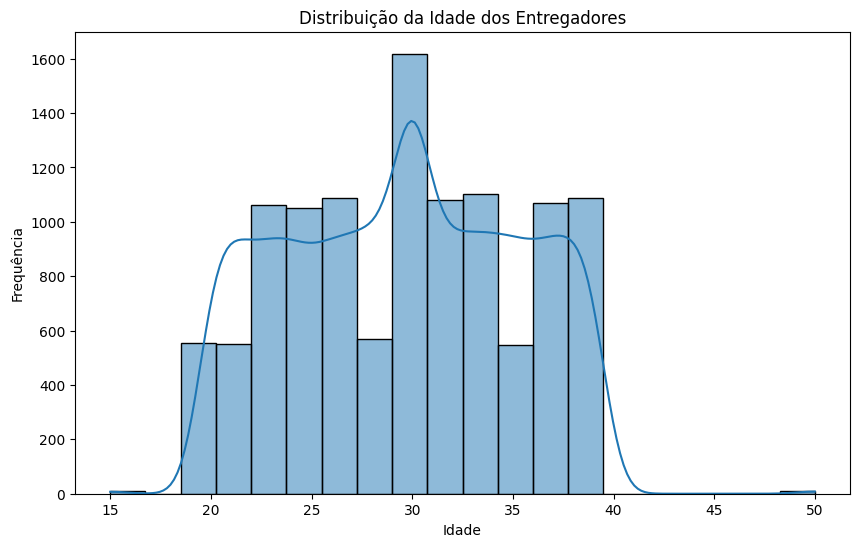

In [ ]:
# Aqui mostro o grafico da Distribuição da Idade dos Entregadores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Delivery_person_Age'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Entregadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

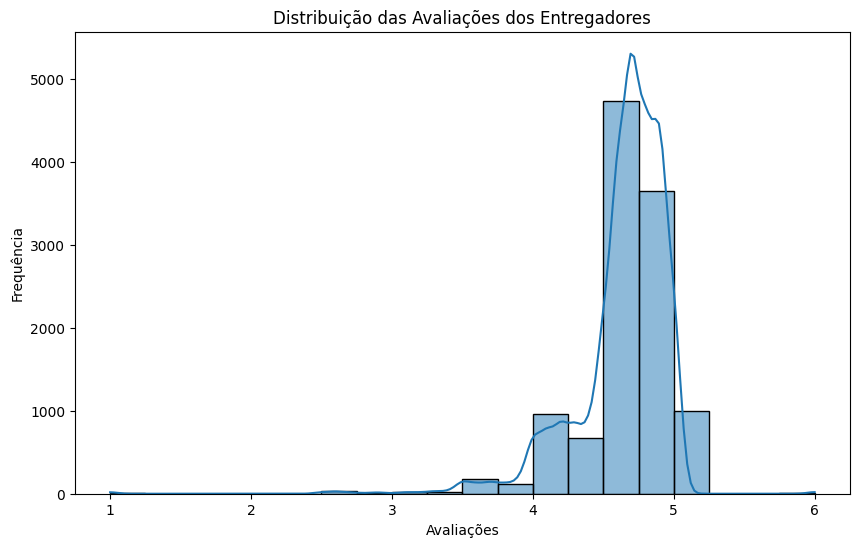

In [ ]:
# Aqui apresento a Distribuição das Avaliações dos Entregadores
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Delivery_person_Ratings'], bins=20, kde=True)
plt.title('Distribuição das Avaliações dos Entregadores')
plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Aqui optei por Exibir as colunas do DataFrame
print(train_df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City'],
      dtype='object')


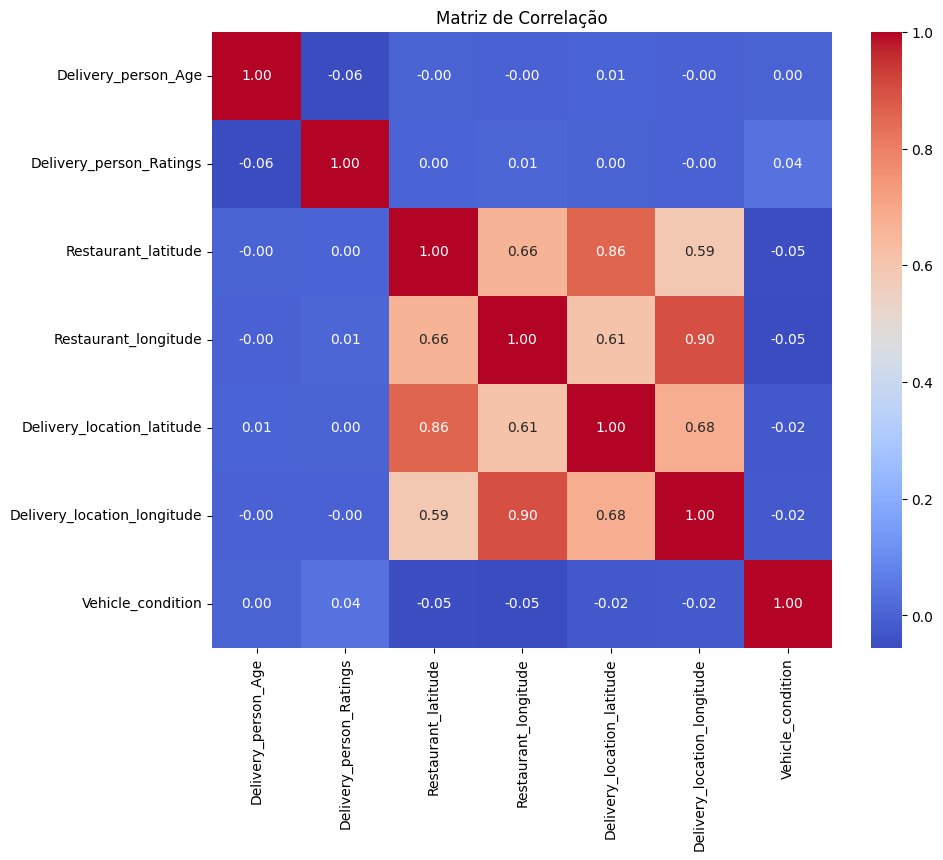

In [ ]:
# Filtrando apenas as colunas numéricas
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
correlation_matrix = numeric_df.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#Aqui optei por utilizar a matriz de correlação em forma de um gráfico de calor pois achei mais prático e interessante a ser mostrado.

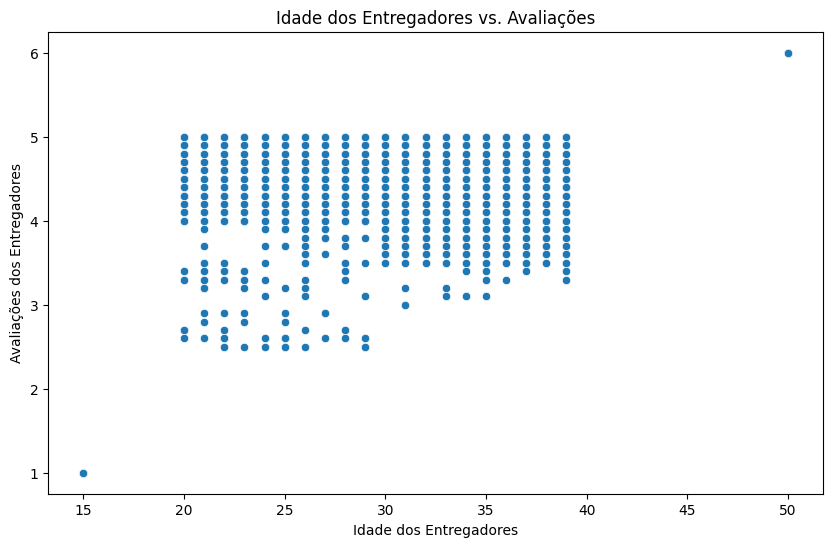

In [ ]:
# Criar um gráfico de dispersão para visualizar a relação entre a idade dos entregadores
# e suas avaliações. Esse gráfico ajuda a identificar padrões ou correlações entre
# essas variáveis, o que pode ser relevante para entender como a experiência (idade)
# pode afetar a qualidade do serviço (avaliações).

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_person_Age', y='Delivery_person_Ratings', data=train_df)
plt.title('Idade dos Entregadores vs. Avaliações')
plt.xlabel('Idade dos Entregadores')
plt.ylabel('Avaliações dos Entregadores')
plt.show()

In [ ]:
# Analisando colunas categóricas

# Contar a frequência de valores na coluna 'Type_of_order'
# Essa contagem ajuda a entender quais tipos de pedidos são mais comuns,
# o que pode influenciar a estratégia de negócios e operações.
print(train_df['Type_of_order'].value_counts())

# Contar a frequência de condições climáticas na coluna 'Weatherconditions'
# Compreender as condições climáticas durante as entregas pode ser importante
# para avaliar como elas impactam o desempenho dos entregadores e o tempo de entrega.
print(train_df['Weatherconditions'].value_counts())

Type_of_order
Drinks     2920
Buffet     2870
Snack      2815
Meal       2794
Name: count, dtype: int64
Weatherconditions
conditions Sunny         1975
conditions Windy         1948
conditions Sandstorms    1878
conditions Cloudy        1861
conditions Stormy        1811
conditions Fog           1768
conditions NaN            158
Name: count, dtype: int64
